<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Calendar" data-toc-modified-id="Calendar-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calendar</a></span><ul class="toc-item"><li><span><a href="#Sift-out-weekends" data-toc-modified-id="Sift-out-weekends-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sift out weekends</a></span></li><li><span><a href="#Compare-with-US-market-calendar" data-toc-modified-id="Compare-with-US-market-calendar-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Compare with US market calendar</a></span></li></ul></li><li><span><a href="#Close-&amp;-Adj-Close" data-toc-modified-id="Close-&amp;-Adj-Close-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Close &amp; Adj Close</a></span><ul class="toc-item"><li><span><a href="#Negative-Adj-Close" data-toc-modified-id="Negative-Adj-Close-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Negative Adj Close</a></span></li><li><span><a href="#Adjustment-coefficients" data-toc-modified-id="Adjustment-coefficients-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Adjustment coefficients</a></span></li><li><span><a href="#Close-prices" data-toc-modified-id="Close-prices-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Close prices</a></span></li></ul></li><li><span><a href="#High-and-Low" data-toc-modified-id="High-and-Low-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>High and Low</a></span></li><li><span><a href="#Open-and-gaps" data-toc-modified-id="Open-and-gaps-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Open and gaps</a></span></li><li><span><a href="#Signal" data-toc-modified-id="Signal-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Signal</a></span><ul class="toc-item"><li><span><a href="#Zero-values" data-toc-modified-id="Zero-values-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Zero values</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Effectiveness-Analysis" data-toc-modified-id="Effectiveness-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Effectiveness Analysis</a></span><ul class="toc-item"><li><span><a href="#Price-forecast-error" data-toc-modified-id="Price-forecast-error-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Price forecast error</a></span></li><li><span><a href="#A-naive-baseline" data-toc-modified-id="A-naive-baseline-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A naive baseline</a></span></li><li><span><a href="#Return-forecast-error" data-toc-modified-id="Return-forecast-error-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Return forecast error</a></span></li><li><span><a href="#Granger-Causality-test" data-toc-modified-id="Granger-Causality-test-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Granger Causality test</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Data Cleaning Exercise

Data Scientists and Analysts are often tasked to clean and analyze datasets. We are working with an external research firm who specializes in the application of artificial intelligence to forecasting prices of financial instruments. This firm has developed a proprietary system, called “4sight”, to forecast prices of certain instruments.

To demonstrate the effectiveness of their forecasting system, the vendor has sent us attached sample dataset. The dataset includes signal values generated by the 4sight system as well as historical prices for a well-known broad market ETF.

A Portfolio Manager has asked you to:

1. Review the quality of the data, list any potential errors, and propose corrected values. Please list each quality check error and correction applied.
2. Please analyze the signal’s effectiveness or lack thereof in forecasting ETF price, using whatever metrics you think are most relevant.
3. (Extra credit) Write a 1-2 paragraph summary for the Portfolio Manager addressing your observations about the efficacy and believability of the product, and recommendation for next steps.
---


## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(12, 9))
plt.rc("font", size=12)

In [2]:
# load data and observe
df_raw = pd.read_excel("./Sample Dataset.xlsx", engine="openpyxl")
df_raw.info()
print(f"\nHeading rows: \n{df_raw.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1038 non-null   datetime64[ns]
 1   Signal     1038 non-null   float64       
 2   Open       1038 non-null   float64       
 3   High       1038 non-null   float64       
 4   Low        1038 non-null   float64       
 5   Close      1038 non-null   float64       
 6   Adj Close  1038 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 56.9 KB

Heading rows: 
        Date     Signal        Open        High         Low       Close  \
0 2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
1 2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2 2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
3 2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
4 2015-11-25  13.019

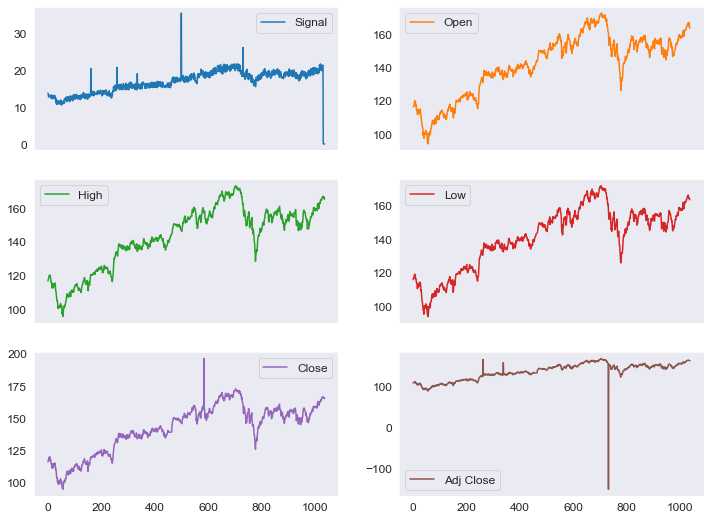

In [3]:
# draw each column
df = df_raw.set_index("Date").sort_index()
df.plot(subplots=True, layout=(3, 2), use_index=False, grid=False)
plt.show()

In [4]:
import pandas_profiling as pp


def show_basic_info(df):
    # if dataset is relatively small, use pandas_profiling for an elegant report
    if df.shape[0] < 2000:
        eda = pp.ProfileReport(df, minimal=True)
        display(eda)
    else:
        print(f"Date duplicated: \n{df.index.duplicated().sum()}")
        print(f"\nNull value counts: \n{df.isnull().sum()}")
        print(f"\nValue statistics: \n{df.describe()}")
        print(f"\nDistinct values: \n{df.apply(lambda c: c.unique().size)}")

show_basic_info(df)

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Good**:
1. No duplicates of Dates
1. No null values

**Not good enough**:
1. Adj Close has negative values
1. Prices have duplicated values (possibly forward filling was performed)
1. Signal has 0s, which seems to be missing values

**Next steps**:
1. Check Dates with market calendar. 
1. Fix negative values in Adj Close, check the adjustment factor and fix abnormal close prices.
1. Check whether some same close prices appears consecutively.
1. Whether High is the real high of the day. Similar to Low.
1. Check gaps between Close and next Open.
1. Check 0 value in Signal. Find and fix outliers.


### Calendar


#### Sift out weekends

In [5]:
flag_weekend = df.index.weekday > 4
n_weekends = flag_weekend.sum()
if n_weekends > 0:
    df = df[~flag_weekend]
    print(f"{n_weekends} days in data are weekends! Removed.")

4 days in data are weekends! Removed.


#### Compare with US market calendar

In [6]:
import pandas_market_calendars as mcal

start = df.index[0].date().isoformat()
end = df.index[-1].date().isoformat()
us_cal = (
    mcal.get_calendar("NYSE")
    .valid_days(start_date=start, end_date=end)
    .tz_localize(None)
)

only_in_data = df.index.difference(us_cal).sort_values()
only_in_data = pd.Series(index=only_in_data, data=only_in_data.weekday, name="weekday")
print(f"Days in data but not US trading days:\n{only_in_data}")

only_in_us = us_cal.difference(df.index).sort_values()
only_in_us = pd.Series(index=only_in_us, data=only_in_us.weekday, name="weekday")
print(f"\nUS trading days but not in data:\n{only_in_us}")

Days in data but not US trading days:
2017-07-04    1
Name: weekday, dtype: int64

US trading days but not in data:
2018-11-12    0
2018-11-13    1
2018-11-14    2
2018-11-15    3
2018-11-16    4
Name: weekday, dtype: int64


* A whole week, starting 2018-11-12, is missing in the data.
* As of the additional datum at 2017-07-04 (Tuesday), examine it with its neighbors:

In [7]:
extra_d = only_in_data.index[0]
extra_d_idx = df.index.get_loc(extra_d)
print(f"Extra date: {extra_d.date()}")
print(f"Adjacent data: \n{df.iloc[extra_d_idx-2:extra_d_idx+3]}")

Extra date: 2017-07-04
Adjacent data: 
               Signal        Open        High         Low       Close  \
Date                                                                    
2017-06-30  16.482053  141.250000  141.669998  140.770004  140.919998   
2017-07-03  16.803540  141.339996  142.500000  141.300003  142.100006   
2017-07-04  15.282748  141.339996  142.600000  141.400003  142.200006   
2017-07-05  15.282748  141.699997  141.850006  140.699997  141.589996   
2017-07-06  15.811562  139.929993  140.470001  138.830002  139.139999   

             Adj Close  
Date                    
2017-06-30  134.474945  
2017-07-03  135.600998  
2017-07-04  135.700998  
2017-07-05  135.114380  
2017-07-06  133.349945  


* Signal is exactly the same with the next day.
* Open is exactly the same with the previous day.
* High, Low, Close and Adj Close are exactly 0.1 plus their predecessors. 

Therefore, 
1. The datum at 2017-07-24 is abnormal and shall be deleted.
2. The ETF is in US market.

In [8]:
df = df[df.index != extra_d]

### Close & Adj Close

#### Negative Adj Close

In [9]:
neg_days = df[df["Adj Close"] <= 0].index
for d in neg_days:
    d_idx = df.index.get_loc(d)
    df_temp = df.iloc[d_idx - 2 : d_idx + 3].copy()
    df_temp["coe"] = df_temp["Adj Close"].abs() / df_temp["Close"]
    print(f"Abnormal date: {d}")
    print(f"Adjacent data: \n{df_temp}")

Abnormal date: 2018-10-10 00:00:00
Adjacent data: 
               Signal        Open        High         Low       Close  \
Date                                                                    
2018-10-08  20.367731  161.770004  162.399994  160.550003  161.820007   
2018-10-09  26.124873  161.619995  162.740005  160.979996  161.190002   
2018-10-10  19.719477  160.820007  160.990005  156.360001  156.559998   
2018-10-11  18.794839  155.809998  157.320007  153.509995  153.570007   
2018-10-12  18.218555  155.559998  155.759995  151.889999  153.600006   

             Adj Close       coe  
Date                              
2018-10-08  157.393982  0.972648  
2018-10-09  156.781219  0.972649  
2018-10-10 -152.277847  0.972648  
2018-10-11  149.369629  0.972648  
2018-10-12  149.398819  0.972649  


Just remove the negative sign is OK since the adjustment coefficient shows consistency.

In [10]:
df.loc[neg_days, "Adj Close"] = df.loc[neg_days, "Adj Close"].abs()

#### Adjustment coefficients

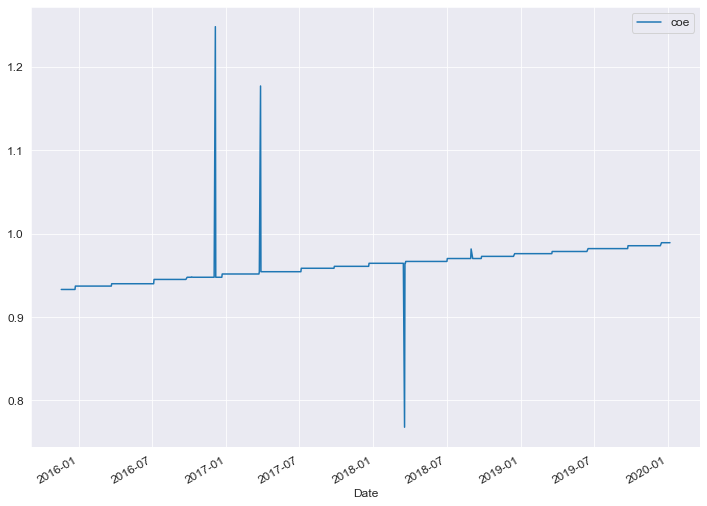

In [11]:
df["coe"] = df["Adj Close"] / df["Close"]
df.plot(y="coe")
plt.show()

* The Adj Close is backward adjusting, since the trend of the coefficients is step-wise increasing to 1.
* For possible abnormal values, comparing its preceding and following values can tell the correct value. 

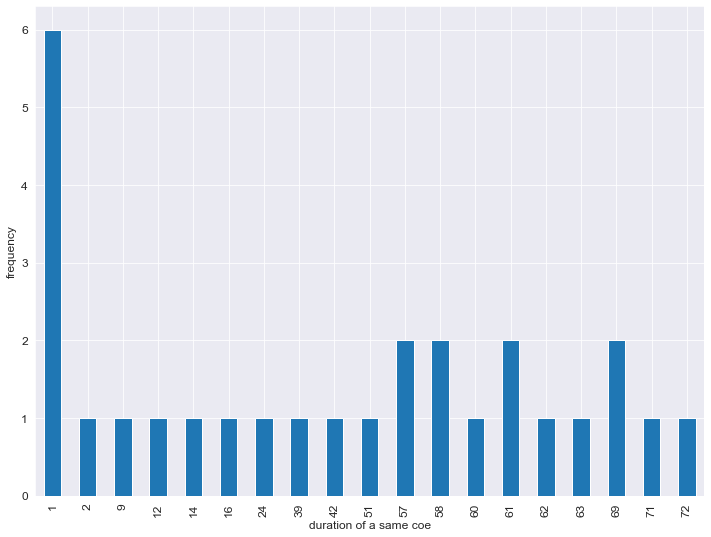

In [12]:
# group them into periods and count durations
thres = pow(10, -6)  # visible difference
s_period = (df["coe"].diff().abs() > thres).cumsum()
s_duration = df["coe"].groupby(s_period).count()
s_duration.value_counts().sort_index().plot(
    kind="bar", xlabel="duration of a same coe", ylabel="frequency"
)
plt.show()

In [13]:
# deal with those single values
flag_bad_coe = pd.Series(index=df.index, data=False)  # mark them
show_cols = ["Close", "Adj Close", "coe"]
for p in s_duration[s_duration == 1].index:
    df_p = df.loc[s_period == p, show_cols]
    focus_day = df_p.index[0]

    df_prev = df.loc[s_period == p - 1, show_cols]
    df_next = df.loc[s_period == p + 1, show_cols]

    # A normal period lasts over 50 days,
    # an abnormal value inside a normal period will split the period into two periods,
    # one of the periods lasts at least 20 days
    if df_prev.shape[0] > 20 or df_next.shape[0] > 20:
        df_focus = pd.concat([df_prev.tail(1), df_p, df_next.head(1)])
        print(f"focus on: {focus_day.date()}: \n{df_focus}")
        prev_coe, cur_coe, next_coe = df_focus["coe"]
        if abs(next_coe - prev_coe) < thres:  # prev
            df.at[focus_day, "coe"] = next_coe
            flag_bad_coe.at[focus_day] = True
            print(f"Amended {focus_day.date()}! {cur_coe} -> {next_coe}\n")
        else:
            print(f"Cannot decide {focus_day}!\n")

bad_coe_count = flag_bad_coe.sum()
print(f"Totally {bad_coe_count} coe are fixed.")

focus on: 2016-10-07: 
                 Close   Adj Close       coe
Date                                        
2016-10-06  123.820000  117.333832  0.947616
2016-10-07  123.830002  117.395706  0.948039
2016-10-10  124.300003  117.788696  0.947616
Amended 2016-10-07! 0.9480392804968218 -> 0.9476161959545568

focus on: 2016-12-05: 
                 Close   Adj Close       coe
Date                                        
2016-12-02  130.899994  124.042938  0.947616
2016-12-05  133.149994  166.175079  1.248029
2016-12-06  134.589996  127.539658  0.947616
Amended 2016-12-05! 1.248029188795908 -> 0.9476161809232834

focus on: 2017-03-24: 
                 Close   Adj Close       coe
Date                                        
2017-03-23  134.779999  128.246490  0.951525
2017-03-24  134.490005  128.339050  0.954265
2017-03-27  134.740005  158.577637  1.176916
Cannot decide 2017-03-24 00:00:00!

focus on: 2017-03-27: 
                 Close   Adj Close       coe
Date                         

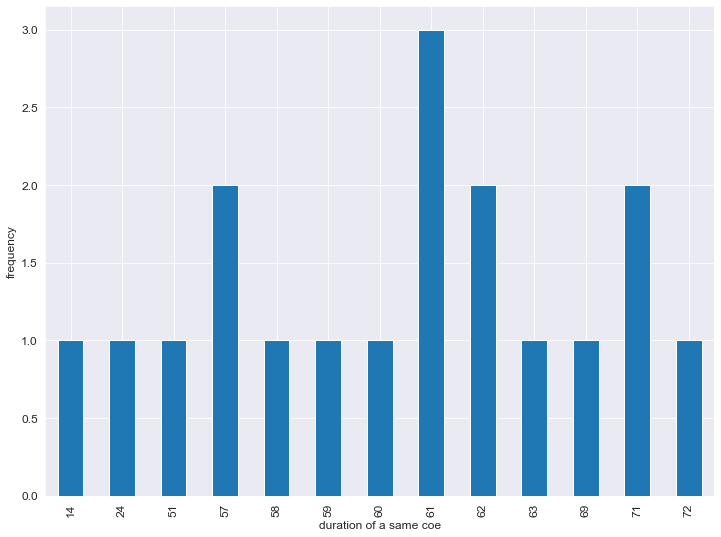

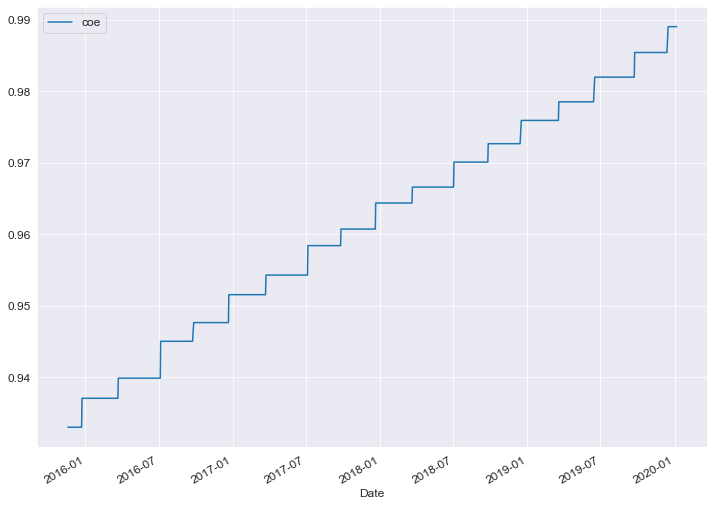

In [14]:
# group again and show the duration frequency
s_duration2 = df["coe"].groupby((df["coe"].diff().abs() > thres).cumsum()).count()
s_duration2.value_counts().sort_index().plot(
    kind="bar", xlabel="duration of a same coe", ylabel="frequency"
)
plt.show()

# show the coe again
df.plot(y="coe")
plt.show()

Now the adjustment coefficient is good. 

#### Close prices

An abnormal coe is due to a wrong Close or Adj Close, or both. First try fixing those data.

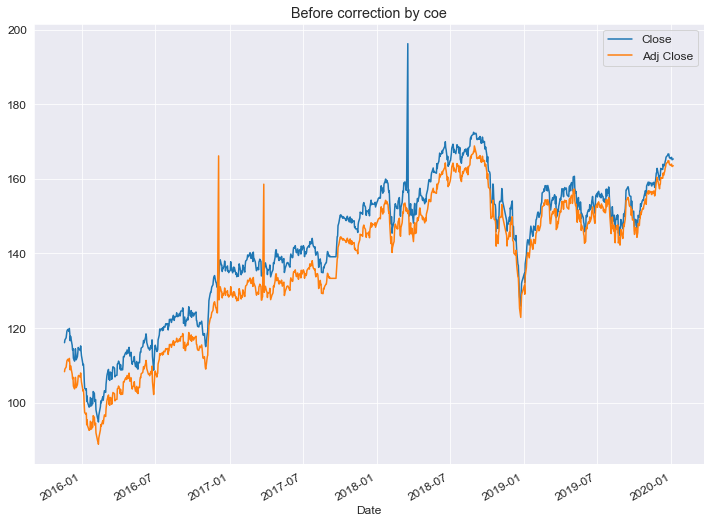

Wrong Close/Adj Close @2016-10-07, (0.0049, 0.0373) Amend Adj Close: 117.3957 -> 117.3433 = 123.8300 * 0.9476
Wrong Close/Adj Close @2016-12-05, (1.2448, 24.6151) Amend Adj Close: 166.1751 -> 126.1751 = 133.1500 * 0.9476
Wrong Close/Adj Close @2017-03-27, (0.1338, 17.0748) Amend Adj Close: 158.5776 -> 128.5776 = 134.7400 * 0.9543
Wrong Close/Adj Close @2018-03-19, (17.6718, -0.6990) Amend Close: 196.28 -> 156.2800 = 150.7082 / 0.9643
Wrong Close/Adj Close @2018-08-31, (-0.1439, 0.7100) Amend Adj Close: 168.8423 -> 166.8722 = 172.0200 * 0.9701


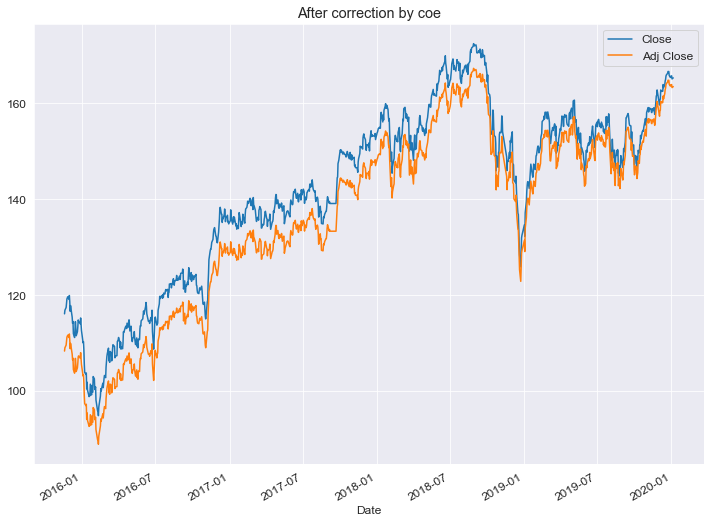

Totally 1 Close and 4 Adj Close values are amended.


In [15]:
# show close prices
df.plot(y=["Close", "Adj Close"], title="Before correction by coe")
plt.show()

# get all one-day returns
s_r1 = df["Adj Close"].reindex(us_cal).pct_change().dropna()
bad_coe_days = flag_bad_coe[flag_bad_coe].index
s_good_r1 = s_r1[~(s_r1.index.isin(bad_coe_days))]

# to calculate z-score, which decides the abnormity degree
mu = s_good_r1.mean()
sigma = s_good_r1.std()

flag_bad_close = pd.Series(index=df.index, data=False)
flag_bad_adjc = pd.Series(index=df.index, data=False)
for d, s_row in df.loc[bad_coe_days, ["Close", "Adj Close", "coe"]].iterrows():
    org, adj, coe = s_row
    d_idx = df.index.get_loc(d)

    if d_idx > 0:
        z_r1_by_adj = (s_r1.at[d] - mu) / sigma
        z_r1_by_org = (org / df["Close"].iat[d_idx - 1] - 1 - mu) / sigma

        print(
            f"Wrong Close/Adj Close @{d.date()}, ({z_r1_by_org:.4f}, {z_r1_by_adj:.4f})",
            end=" ",
        )
        if abs(z_r1_by_org) > abs(z_r1_by_adj):  # Close is more abnormal
            temp = adj / coe
            df.at[d, "Close"] = temp
            flag_bad_close.at[d] = True
            print(f"Amend Close: {org:.2f} -> {temp:.4f} = {adj:.4f} / {coe:.4f}")
        else:
            temp = org * coe
            df.at[d, "Adj Close"] = temp
            flag_bad_adjc.at[d] = True
            print(f"Amend Adj Close: {adj:.4f} -> {temp:.4f} = {org:.4f} * {coe:.4f}")

# show close prices again
df.plot(y=["Close", "Adj Close"], title="After correction by coe")
plt.show()

print(
    f"Totally {flag_bad_close.sum()} Close and {flag_bad_adjc.sum()} Adj Close values are amended."
)

Note that both absolute r1 z-scores for Close and Adj Close on 2016-10-07 (<<1) and 2018-08-31 (<1) are small, which means both of the two prices are only slightly abnormal. For the consistency of coe, one of them has to be amended. In fact,
* It is possible that the amended price is actually correct.
* It is also possible that both prices are slightly wrong.

---
Now, detect consecutive same prices.

In [16]:
# group Close and count durations
px_diff_thres = pow(10, -4)  # visible difference
s_close_groups = (df["Close"].diff().abs() > px_diff_thres).cumsum()
s_cg_durations = df["Close"].groupby(s_close_groups).count()
duration_freq = s_cg_durations.value_counts().sort_index()
print(duration_freq)

1     1017
2        2
12       1
Name: Close, dtype: int64


* There are two case: a same price appears twice consecutively, which is possible to happen.
* But a price appears 12 days in sequence, it is definitely abnormal!

In [17]:
# have a look at those values with duration 2
for group_no in s_cg_durations[s_cg_durations == 2].index:
    df_focus = df.loc[s_close_groups[s_close_groups == group_no].index]
    df_prev = df.loc[s_close_groups[s_close_groups == group_no - 1].index]
    df_next = df.loc[s_close_groups[s_close_groups == group_no + 1].index]

    print(f"Duplicate Close: {df_focus['Close'].iat[0]}")
    print(f"Adjacent values:\n{pd.concat([df_prev, df_focus, df_next])}\n")

Duplicate Close: 122.940002
Adjacent values:
               Signal        Open        High         Low       Close  \
Date                                                                    
2016-08-17  14.252677  122.440002  122.500000  121.330002  122.040001   
2016-08-18  14.070737  122.080002  122.970001  122.040001  122.940002   
2016-08-19  14.374889  122.769997  123.070000  122.279999  122.940002   
2016-08-22  14.402919  122.680000  123.339996  122.330002  123.220001   

             Adj Close       coe  
Date                              
2016-08-17  115.328331  0.945004  
2016-08-18  116.178825  0.945004  
2016-08-19  116.178825  0.945004  
2016-08-22  116.443436  0.945004  

Duplicate Close: 166.679993
Adjacent values:
               Signal        Open        High         Low       Close  \
Date                                                                    
2019-12-23  20.855705  166.240005  166.360001  165.360001  166.300003   
2019-12-24  21.361876  166.449997  166.69

In [18]:
# Now deal with duration 12
cg12_no = s_cg_durations[s_cg_durations == 12].index[0]
cg12_days = s_close_groups[s_close_groups == cg12_no].index
df_focus = df.loc[cg12_days]
df_prev = df.loc[s_close_groups[s_close_groups == cg12_no - 1].index]
df_next = df.loc[s_close_groups[s_close_groups == cg12_no + 1].index]

print(f"Duplicate Close: {df_focus['Close'].iat[0]}")
print(f"Adjacent values:\n{pd.concat([df_prev, df_focus, df_next])}\n")

Duplicate Close: 139.110001
Adjacent values:
               Signal        Open        High         Low       Close  \
Date                                                                    
2017-09-06  16.318515  139.740005  140.000000  139.080002  139.460007   
2017-09-07  16.478500  139.589996  139.690002  138.589996  139.110001   
2017-09-08  15.518587  138.929993  139.770004  138.619995  139.110001   
2017-09-11  15.838558  140.389999  140.919998  140.229996  139.110001   
2017-09-12  15.518587  141.039993  141.690002  140.820007  139.110001   
2017-09-13  16.158529  141.410004  142.220001  141.320007  139.110001   
2017-09-14  16.478500  141.779999  142.160004  141.419998  139.110001   
2017-09-15  15.198617  141.639999  142.470001  141.550003  139.110001   
2017-09-18  15.518587  142.619995  143.809998  142.600006  139.110001   
2017-09-19  16.798471  143.570007  143.690002  143.089996  139.110001   
2017-09-20  15.953688  143.529999  144.020004  143.259995  139.110001   
2017-0

Notice that the Open values during the period seems OK. Without more information, one appropriate way to amend the Close is replacing it with its next Open.

In [19]:
duplicate_days = cg12_days[1:]  # the first is OK
df.loc[duplicate_days, "Close"] = df["Open"].shift(-1).loc[duplicate_days]
df.loc[duplicate_days, "Adj Close"] = (
    df.loc[duplicate_days, "Close"] * df.loc[duplicate_days, "coe"]
)
print(f"Ameneded {duplicate_days.size} days:\n{duplicate_days}")

Ameneded 11 days:
DatetimeIndex(['2017-09-08', '2017-09-11', '2017-09-12', '2017-09-13',
               '2017-09-14', '2017-09-15', '2017-09-18', '2017-09-19',
               '2017-09-20', '2017-09-21', '2017-09-22'],
              dtype='datetime64[ns]', name='Date', freq=None)


### High and Low

In [20]:
s_realhigh = df[["Open", "High", "Low", "Close"]].max(axis=1)
flag_bad_high = df["High"] < s_realhigh
bad_high_days = flag_bad_high.index[flag_bad_high]
bad_high_count = bad_high_days.size
print(f"{bad_high_count} days with High not being the highest price:\n{bad_high_days}")

8 days with High not being the highest price:
DatetimeIndex(['2017-08-07', '2017-09-08', '2017-09-11', '2017-09-15',
               '2018-03-07', '2018-07-16', '2018-12-06', '2019-10-17'],
              dtype='datetime64[ns]', name='Date', freq=None)


Without more information, the only way to amend this is replacing High with highest price among Open\Low\Close.

In [21]:
df.loc[flag_bad_high, "High"] = s_realhigh[flag_bad_high]
print(f"Amended {bad_high_count} High data.")

Amended 8 High data.


In [22]:
# do the same with Low
s_reallow = df[["Open", "High", "Low", "Close"]].min(axis=1)
flag_bad_low = df["Low"] > s_reallow
bad_low_days = flag_bad_low.index[flag_bad_low]
bad_low_count = bad_low_days.size
print(f"{bad_low_count} days with Low not being the lowest price:\n{bad_low_days}")

df.loc[flag_bad_low, "Low"] = s_reallow[flag_bad_low]
print(f"Amended {bad_low_count} Low data.")

5 days with Low not being the lowest price:
DatetimeIndex(['2018-03-07', '2018-07-16', '2018-10-19', '2019-06-10',
               '2019-09-24'],
              dtype='datetime64[ns]', name='Date', freq=None)
Amended 5 Low data.


In [23]:
# similar to Close, group values and count durations to see consecutive values
for c in ["High", "Low"]:
    #     px_diff_thres = pow(10, -4)  # visible difference
    s_groups = (df[c].diff().abs() > px_diff_thres).cumsum()
    s_g_durations = df[c].groupby(s_groups).count()
    duration_freq = s_g_durations.value_counts().sort_index()
    print(f"{c} duration_freq:\n{duration_freq}\n")

High duration_freq:
1    1027
2       3
Name: High, dtype: int64

Low duration_freq:
1    1023
2       5
Name: Low, dtype: int64



Notice that the only several cases with a High/Low price lasts two consecutive days, which is fine.

### Open and gaps

First check consecutive Opens.

In [24]:
c = "Open"
# px_diff_thres = pow(10, -4)  # visible difference
s_groups = (df[c].diff().abs() > px_diff_thres).cumsum()
s_g_durations = df[c].groupby(s_groups).count()
duration_freq = s_g_durations.value_counts().sort_index()
print(f"{c} duration_freq:\n{duration_freq}\n")

Open duration_freq:
1    1027
2       3
Name: Open, dtype: int64



Similar to High and Low, Open looks fine considering duplicate values.

---
Now check gaps between Open and its previous Close to detect potential absurd values.
Notice that both adjusted values shall be used.

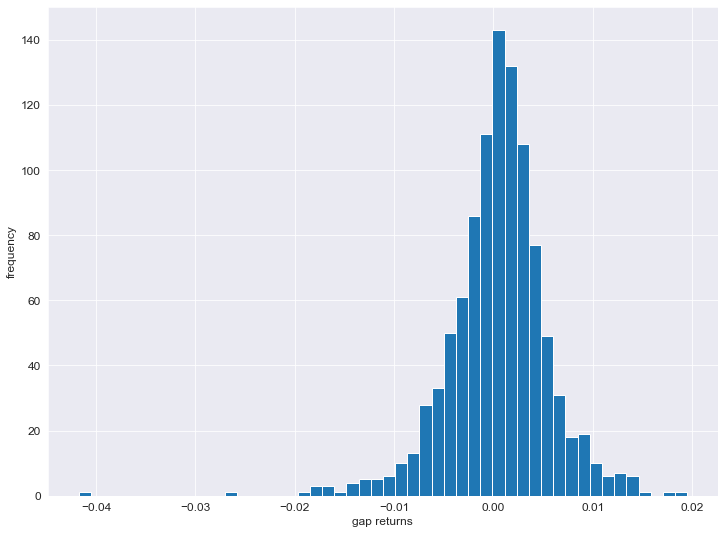

In [25]:
# use adjusted open and close to get the overnight gap return
s_adjopen = (df["Open"] * df["coe"]).reindex(us_cal)
s_adjclose = df["Adj Close"].reindex(us_cal)
s_gaps = s_adjopen / s_adjclose.shift() - 1

s_gaps.hist(bins=50)
plt.xlabel("gap returns")
plt.ylabel("frequency")
plt.show()

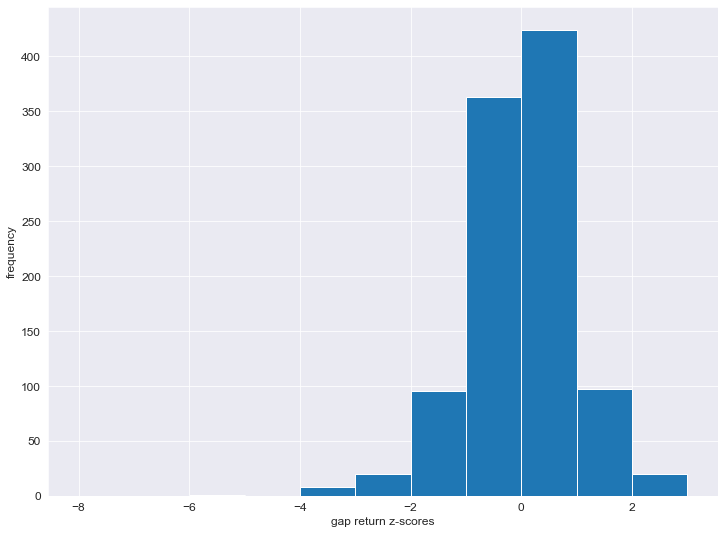

In [26]:
# turn into z-scores
z_gaps = (s_gaps - s_gaps.mean()) / s_gaps.std()
bins = range(int(z_gaps.min()), int(z_gaps.max() + 1))


z_gaps.hist(bins=bins)
plt.xlabel("gap return z-scores")
plt.ylabel("frequency")
plt.show()

In [27]:
top5_days = z_gaps.abs().dropna().sort_values(ascending=False).index[:5]
print(f"The 5 gap returns with highest absolute z-scores: \n{s_gaps.loc[top5_days]}")

The 5 gap returns with highest absolute z-scores: 
2016-06-24   -0.041774
2016-01-15   -0.026432
2019-05-13   -0.018708
2016-11-07    0.019527
2019-08-05   -0.018351
dtype: float64


* The distribution of gap returns looks fine. 
* The extreme gap has a return of -4.2%, which is also possible. 

There is no clear evidence of abnormal Open.

### Signal

Signals are predictions by the 4sight system, and in fact shall **not** be amended before assessing its effectiveness. 

However, in practice, some *obviously absurd* signals will not be used even if 4sight's predictions were indeed effective. For example, a non-positive price, or a price with daily return over 100% (the underlying is a broad market ETF).


The following steps try to detect and mark these obviously absurd signals.

#### Zero values

Signal at these 6 days are 0:
DatetimeIndex(['2019-12-27', '2019-12-30', '2019-12-31', '2020-01-02',
               '2020-01-03', '2020-01-06'],
              dtype='datetime64[ns]', name='Date', freq=None)


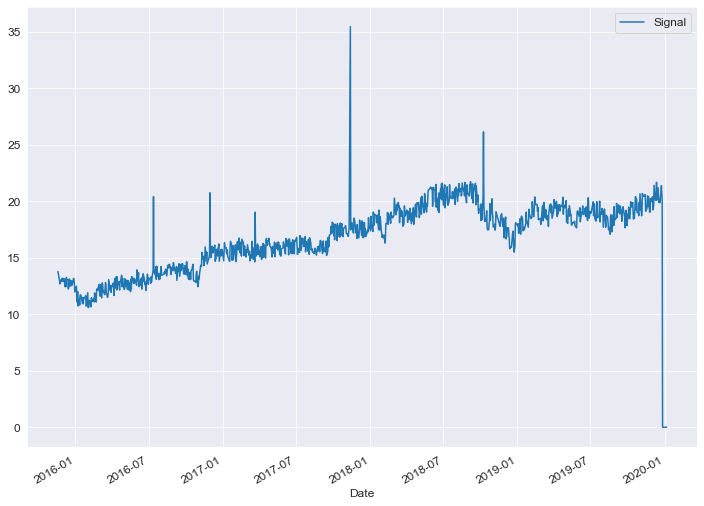

In [28]:
df.plot(y="Signal")
zero_days = df[df["Signal"] <= 0.0001].index
print(f"Signal at these {zero_days.size} days are 0:\n{zero_days}")

In [29]:
df.loc[zero_days, "Signal"] = np.nan
print(f"Zero values are set to nan.")

Zero values are set to nan.


* Notice that 0 only appears at the ending days of the series. This implies that the last several days of prices are incorporated for comparison with signals (predictions).
* There are several outliers deviates from its neighbors too much.

#### Outliers

The method dealing with coe (*Grouping consecutive similar signals together, and if a group with only 1 value but surrounded by two groups with comparable values, the single value is abnormal*) cannot be used here. This is because when using Signal in practice, we do not have the **future** signals.

Notice that Signal vibrates around a slowly changing trend-line. Try the following method: 
1. Compare Signal with its exponentially smoothed line.
1. Normalize the difference by recent standard deviation.
1. Decide a threshold. If a signal deviates over the threshold, the signal is an outlier and shall be modified.

If 4sight's effectiveness is proven, and its signal is used in some strategies, the above filtering can be applied and thus consistency is guaranteed. 

<AxesSubplot:title={'center':'before removing outliers'}, xlabel='Date'>

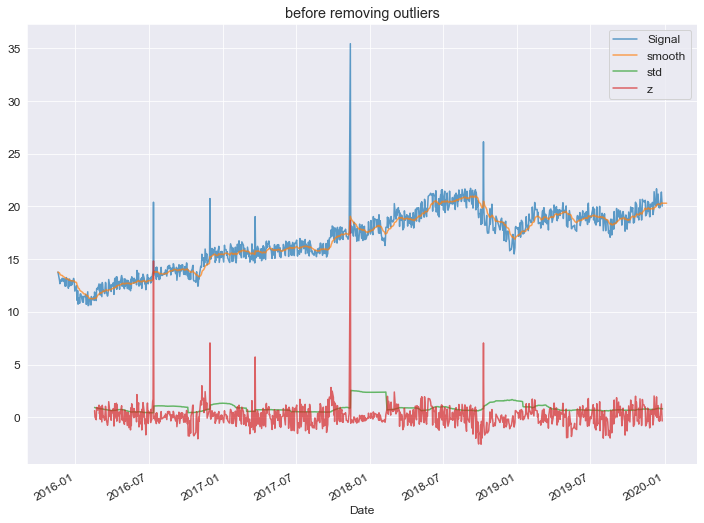

In [30]:
w_ema = 20  # 1-month EMA
w_std = 60  # 3-month std

df_sig = df[["Signal"]].reindex(columns=["Signal", "smooth", "std", "z"])
df_sig["smooth"] = df_sig["Signal"].ewm(span=w_ema, adjust=False).mean()
df_sig["std"] = df_sig["Signal"].rolling(w_std).std().shift()
df_sig["z"] = (df_sig["Signal"] - df_sig["smooth"]) / df_sig["std"]

df_sig.plot(alpha=0.7, title="before removing outliers")

Setting threshold = 5, and process day by day to mitigate effects of abnormal values on std.

Bad sig 20.3951 @2016-07-13, deviates ewma_20 14.88 times std_60 (0.44)! Replaced with previous sig 13.8455.
Bad sig 20.7386 @2016-11-30, deviates ewma_20 7.11 times std_60 (0.78)! Replaced with previous sig 15.3317.
Bad sig 19.0293 @2017-03-22, deviates ewma_20 5.75 times std_60 (0.57)! Replaced with previous sig 14.6307.
Bad sig 35.4341 @2017-11-13, deviates ewma_20 18.61 times std_60 (0.88)! Replaced with previous sig 17.6284.
Bad sig 26.1249 @2018-10-09, deviates ewma_20 7.03 times std_60 (0.80)! Replaced with previous sig 20.3677.


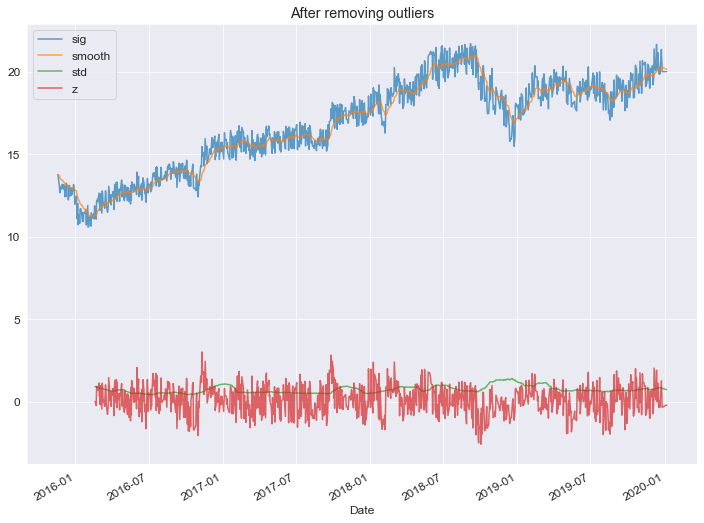

In [31]:
z_thres = 5

alpha = 2 / (1 + w_ema)
df_sig = pd.DataFrame(index=df.index, columns=["sig", "smooth", "std", "z", "flag"])
for d_idx, (d, cur_sig) in enumerate(df["Signal"].iteritems()):
    if np.isnan(cur_sig):
        cur_sig = prev_sig

    cur_smooth = cur_sig if d_idx == 0 else alpha * cur_sig + (1 - alpha) * prev_smooth
    flag = False

    if d_idx < w_std:
        std = z = np.nan
    else:
        std = (
            df_sig["sig"].iloc[d_idx - w_std - 1 : d_idx].std()
        )  # do not include current value
        z = (cur_sig - cur_smooth) / std

        if abs(z) > z_thres:
            print(
                f"Bad sig {cur_sig:.4f} @{d.date()}, deviates ewma_{w_ema} {z:.2f} times std_{w_std} ({std:.2f})! "
                f"Replaced with previous sig {prev_sig:.4f}."
            )
            cur_sig = prev_sig
            cur_smooth = alpha * cur_sig + (1 - alpha) * prev_smooth
            z = (cur_sig - cur_smooth) / std
            flag = True

    df_sig.loc[d, ["sig", "smooth", "std", "z", "flag"]] = [
        cur_sig,
        cur_smooth,
        std,
        z,
        flag,
    ]
    prev_sig = cur_sig
    prev_smooth = cur_smooth

df_sig.plot(alpha=0.7, title="After removing outliers")
plt.show()

* These outliers are replaced with its predecessors in the process. There are also other replacement methods, like using smoothed value +/- std, or using predictions of ARCH\GARCH models.
* Just ignoring these outliers is enough to analyze the effectiveness of the Signal.

In [32]:
flag_bad_sig = df_sig["flag"]
df.loc[flag_bad_sig, "Signal"] = np.nan

### Summary

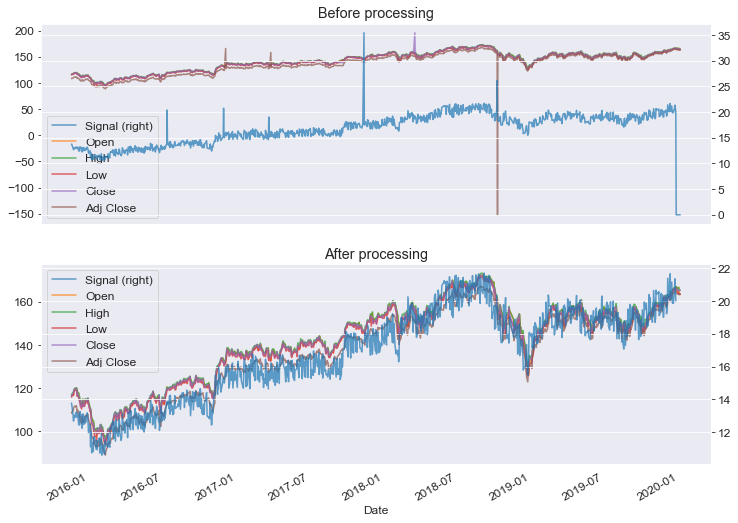

In [33]:
if "Date" in df_raw.columns:
    df_raw = df_raw.set_index("Date")
    
fig, axs = plt.subplots(2, 1, sharex=True)
df_raw.plot(secondary_y=["Signal"], alpha=0.7, title="Before processing", ax=axs[0])
df.plot(
    y=["Signal", "Open", "High", "Low", "Close", "Adj Close"],
    secondary_y=["Signal"],
    alpha=0.7,
    title="After processing",
    ax=axs[1]
)
plt.show()

After fixing/removing abnormal values, the curves looks much better and relationships between Signal and prices are much clearer. The amendments are listed as belows:

1. Calendar
    * 4 days are weekends: *deleted*
    * 1 day is not valid: *deleted*
    * 5 days (a whole week) are missing: *left blank*
2. Close and Adj Close
    * 1 Adj Close is negative: *turned positive*
    * 1 Close is wrong: *fixed by Adj Close and adjustment coefficient*
    * 4 Adj Close is wrong: *fixed by Close and adjustment coefficient*
    * 11 days with wrong Close and Adj Close (duplicates): *use next Open*
3. High and Low
    * 8 High are not highest in the day: *replace with the highest*
    * 5 Low are not lowest in the day: *replace with the lowest*
4. Signal
    * 6 days are 0: *left blank*
    * 5 days are outliers: *left blank*
---

Moreover, given that the ETF is **well-known**, **broad market** and in the **US** market, it is not difficult to find the true underlying is *iShares Russell 2000 ETF* (ticker: IWM). 

In [34]:
# get historical prices as reference
try:
    import yfinance as yf

    s = "IWM"
    buffer = 5
    dl_start = (df.index[0] - pd.Timedelta(days=buffer)).date().isoformat()
    dl_end = (df.index[-1] + pd.Timedelta(days=buffer)).date().isoformat()
    ref = yf.Ticker(s).history(start=dl_start, end=dl_end, auto_adjust=False)
except:
    ref = pd.read_csv('IWM.csv', parse_dates=[0], index_col=[0])

ref = ref.reindex(us_cal)

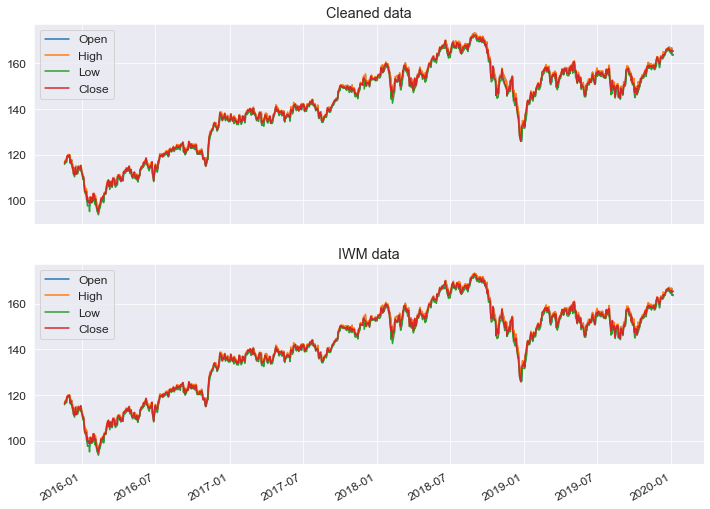

In [35]:
# compare ref with df
cols = ["Open", "High", "Low", "Close"]
fig, axs = plt.subplots(2, 1)
df[cols].plot(title="Cleaned data", ax=axs[0])
ref[cols].plot(title="IWM data", sharex=True, ax=axs[1])
plt.show()

missings days: 
2018-11-12    0
2018-11-13    1
2018-11-14    2
2018-11-15    3
2018-11-16    4
Name: weekday, dtype: int64

The biggest difference between adjustment coefficients: 5.761493271361218e-07

No errors in Open!



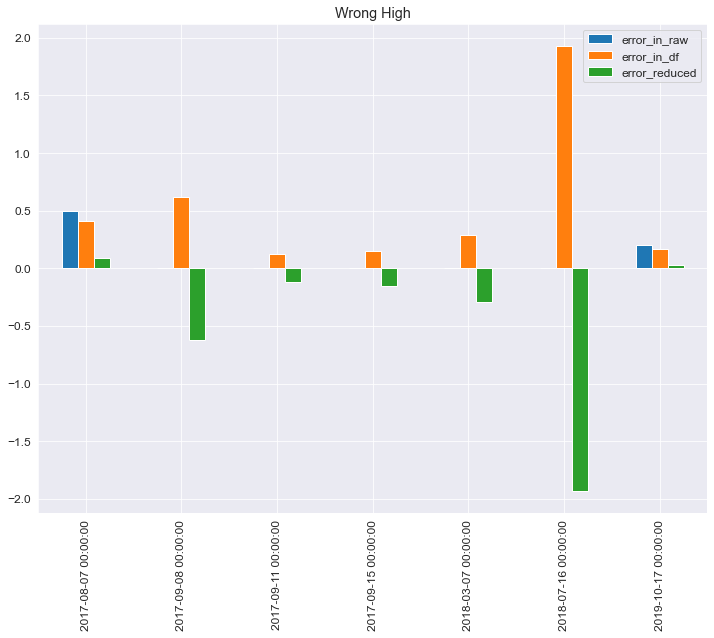

Wrong High
            error_in_raw  error_in_df  error_reduced
2017-08-07  5.000061e-01     0.410004       0.090002
2017-09-08  2.724609e-07     0.619995      -0.619994
2017-09-11  1.689453e-07     0.119995      -0.119995
2017-09-15  2.207031e-07     0.149994      -0.149994
2018-03-07  3.242187e-07     0.290008      -0.290008
2018-07-16  2.207031e-07     1.930008      -1.930008
2019-10-17  1.999995e-01     0.169999       0.030001



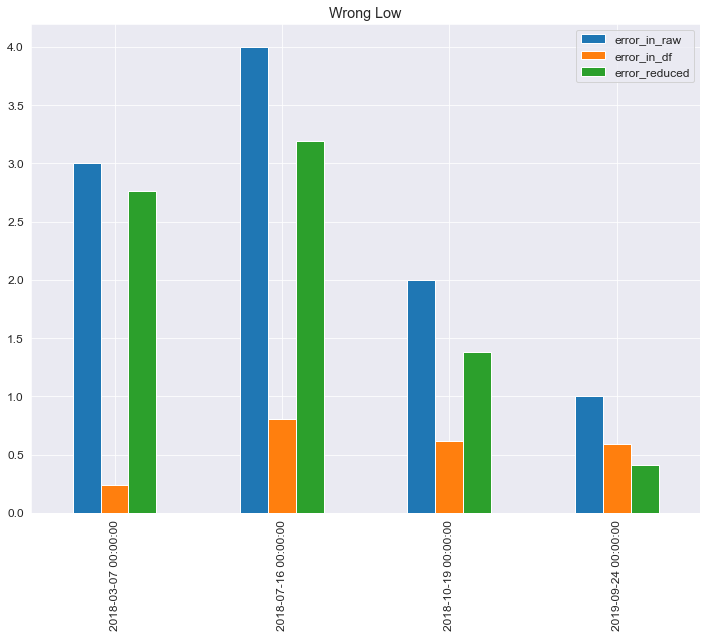

Wrong Low
            error_in_raw  error_in_df  error_reduced
2018-03-07           3.0     0.240006       2.759994
2018-07-16           4.0     0.809997       3.190003
2018-10-19           2.0     0.619996       1.380004
2019-09-24           1.0     0.589997       0.410003



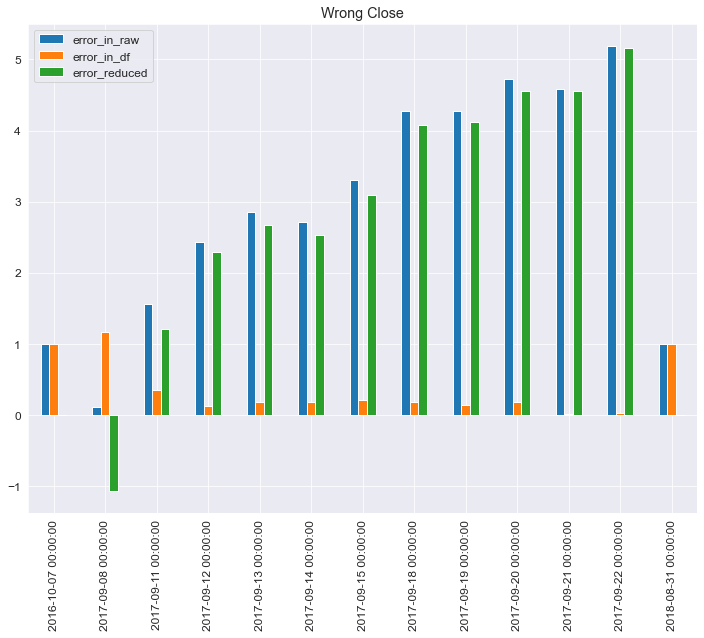

Wrong Close
            error_in_raw  error_in_df  error_reduced
2016-10-07      1.000000     1.000000       0.000000
2017-09-08      0.110000     1.169998      -1.059998
2017-09-11      1.569992     0.360000       1.209991
2017-09-12      2.429992     0.129989       2.300003
2017-09-13      2.850006     0.180008       2.669998
2017-09-14      2.720001     0.190003       2.529998
2017-09-15      3.300003     0.209991       3.090011
2017-09-18      4.270004     0.190002       4.080002
2017-09-19      4.270004     0.149994       4.120010
2017-09-20      4.729995     0.180008       4.549988
2017-09-21      4.580001     0.020004       4.559997
2017-09-22      5.190002     0.029999       5.160003
2018-08-31      1.000000     1.000000       0.000000



In [36]:
# detailed comparisons
ref["coe"] = ref["Adj Close"] / ref["Close"]
ref = ref.reindex(us_cal)
df_cp = ref[cols] - df[cols]
df_cp["coe"] = ref["coe"] / df["coe"]
df_cp["coe"] = df_cp["coe"] / df_cp["coe"].iat[-1] - 1  # coe in the periods only
df_cp = df_cp.abs()

missing_days = ref.index.difference(df.index).sort_values()
missing_days = pd.Series(index=missing_days, data=missing_days.weekday, name="weekday")
print(f"missings days: \n{missing_days}\n")

coe_diff_max = df_cp["coe"].dropna().abs().max()
print(f'The biggest difference between adjustment coefficients: {coe_diff_max}\n')

for c in cols:
    flag_wrong = df_cp[c] > px_diff_thres
    wrong_days = flag_wrong.index[flag_wrong]
    if wrong_days.empty:
        print(f"No errors in {c}!\n")
    else:
        s_ref = ref.loc[wrong_days, c]

        df_temp = pd.DataFrame()
        df_temp["error_in_raw"] = abs(df_raw.loc[wrong_days, c] - s_ref)
        df_temp["error_in_df"] = abs(df.loc[wrong_days, c] - s_ref)
        df_temp["error_reduced"] = df_temp["error_in_raw"] - df_temp["error_in_df"]

        title = f"Wrong {c}"
        df_temp.plot(kind="bar", title=title, xlabel="")
        plt.show()
        print(f"{title}\n{df_temp}\n")

Comparing with ground truth, the processed data has

* 5 days of data are missing;
* adjustment coefficients with no errors;
* 7 days of Highs with errors, 5 of them with larger errors than raw data, and 2 of them are lower;
* 4 days of Lows with errors, all of them with reduced errors than raw data;
* 13 days of Closes with errors, 10 of them with reduced errors than raw data, 2 of them are same, while 1 of them is larger;

Recall the processing process, the amendments of Close\High\Low were logical and provided positive increments on data quality.

In the following, the reference data will be used instead of the still slightly erroneous data.

In [37]:
data = ref[['Open', 'High', 'Low', 'Close', 'Adj Close']].copy()
data['Signal'] = df['Signal']

## Effectiveness Analysis

<AxesSubplot:>

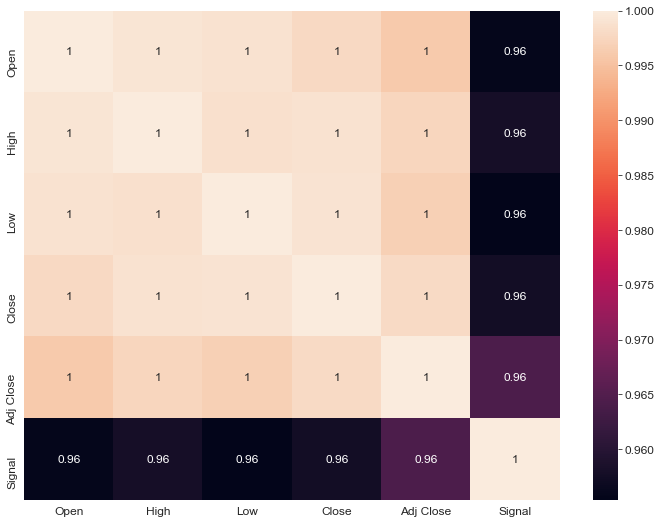

In [38]:
sns.heatmap(data.corr(), annot=True)

Both the data plots and the heatmap above show a high correlation between Signal and prices. Before detailed assessments, the following problems shall be clarified:

1. The prediction is about Close or Adj Close or others?
    * When talking about predicting prices, close prices are the default targets. Otherwise, it will be claimed explicitly.
    * Adj Closes are adjusted values of Close due to later happened dividends. In fact, the Adj Price in ref is 0.993526 times of that in the sample dataset, which implies the sample dataset was generated one or two seasons before (one or two times of dividends). 
    * In practice, Signal is generated daily to forecast the future price, and its value was not affected by dividends in its future. If it was stated that the Signal was collected intact from the daily-running 4Sight system, then Close shall be used, otherwise, it is reasonable to assume that the Signal was already backward adjusted for the ease of assessment.  
   
   Therefore, the prediction is about Adj Close.
    

2. What is the time horizon?

    Normally, a Signal given at day $T$ is a forecast of price at $T+1$. However, as the prediction horizon was not stated explicitly, it is possible that the Signal given at day $T$ is a actually forecasting the price at $T+2, T+3, ...$. Given that there are 6 zeros at the end of Signal series, the largest time horizon can be limited to 6 days.
    

3. Signal and prices are not at the same order of magnitude.

    Suppose a time horizon $\Delta$, that $Sig(T)$ is forecasting $PX(T+\Delta)$, and thus $PX(T)$ was forecasted by $Sig(T-\Delta)$. Now given $PX(T)$ and $Sig$ series, the predicted value of $PX(T+\Delta)$ is 
    $$PX(T) * Sig(T) / Sig(T-\Delta)$$
    

### Price forecast error 

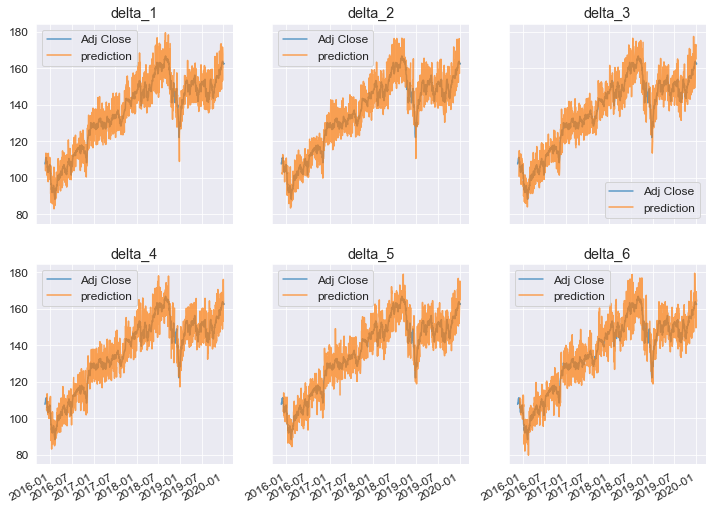

Metrics with different time horizons:
             rmse      mape  r_squared
delta_1  6.411645  0.038427   0.889499
delta_2  6.351634  0.037253   0.891614
delta_3  6.454787  0.038177   0.888103
delta_4  6.394662  0.037772   0.890244
delta_5  6.432814  0.038968   0.888849
delta_6  6.376782  0.037711   0.890701


In [39]:
import sklearn.metrics as skm

metric_list = [
    ["rmse", lambda s_true, s_pred: skm.mean_squared_error(s_true, s_pred) ** 0.5],
    ["mape", skm.mean_absolute_percentage_error],
    ["r_squared", skm.r2_score],
]

delta_max = 6
deltas = list(range(1, delta_max + 1))

df_metric = pd.DataFrame(index=[f"delta_{delta}" for delta in deltas])
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

df_delta_list = []
for delta in deltas:
    i = delta - 1
    ax = axs[i // 3][i % 3]

    df_delta = data[["Adj Close", "Signal"]].copy()
    df_delta["prediction"] = (
        df_delta["Signal"] / df_delta["Signal"].shift(delta) * df_delta["Adj Close"]
    ).shift(delta)  # the predicted value

    df_delta_list.append(df_delta)
    df_delta.plot(
        y=["Adj Close", "prediction"], ax=ax, alpha=0.7, title=f"delta_{delta}"
    )  # true value vs predicted

    temp = df_delta.dropna(subset=["prediction"])
    for name, func in metric_list:
        df_metric.at[f"delta_{delta}", name] = func(
            temp["Adj Close"], temp["prediction"]
        )
plt.show()
print(f"Metrics with different time horizons:\n{df_metric}")

1. The averaged prediction error is nearly 6.4 in price, and 3.8% in percentage of price. Since the price ranges from 88 to 167 during the period, *3.8%* is a more appropriate description of error.
2. The $R^2$ score shows around *89%* of variation of price can be explained by prediction.

### A naive baseline

The prediction of price seems not bad. However, the result is not reliable due to the fact that price series is not stationary (have trends). The non-stationary of prices can be concluded from ADF test with a large p-value, together with a KPSS test with a small p-value.

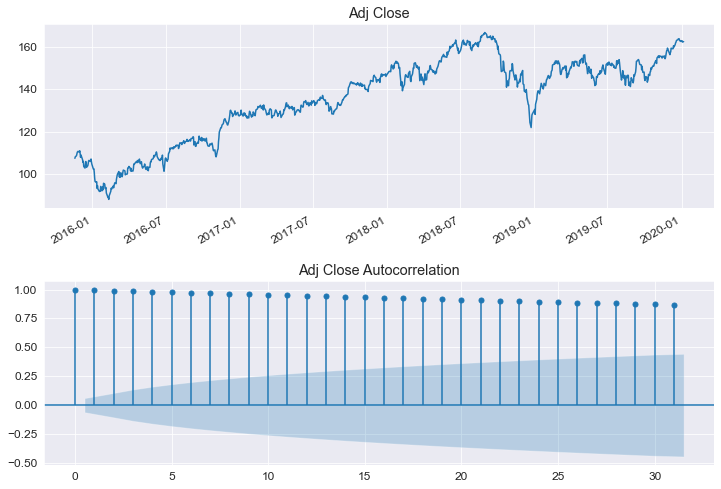

The p-value of adfuller test: 0.4347427607860661
The p-value of kpss test: 0.01


In [40]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings("ignore")

def show_stationary(timeseries, regression="ct"):
    fig, axs = plt.subplots(2, 1)
    timeseries.plot(ax=axs[0], title=timeseries.name)
    plot_acf(timeseries, title=f"{timeseries.name} Autocorrelation", ax=axs[1])
    plt.subplots_adjust(hspace=0.4)
    plt.show()

    res_adf = adfuller(timeseries, regression=regression)
    print(f"The p-value of adfuller test: {res_adf[1]}")

    res_kpss = kpss(timeseries, regression=regression, nlags="auto")
    print(f"The p-value of kpss test: {res_kpss[1]}")


show_stationary(data["Adj Close"])

Therefore, a natural and naive baseline is a predictor that always gives the latest price as it prediction. Calculate the metrics again:

In [41]:
df_metric_naive = pd.DataFrame(index=[f"delta_{delta}" for delta in deltas])
s_px = data["Adj Close"]
for delta in deltas:
    c = f"delta_{delta}"
    for name, func in metric_list:
        df_metric_naive.at[c, name] = func(
            s_px.iloc[delta:], s_px.shift(delta).iloc[delta:]
        )
print(f"Metrics of a naive predictor: \n{df_metric_naive}")

Metrics of a naive predictor: 
             rmse      mape  r_squared
delta_1  1.352830  0.007625   0.995064
delta_2  1.905921  0.010834   0.990192
delta_3  2.333661  0.013408   0.985283
delta_4  2.724311  0.015676   0.979926
delta_5  3.071703  0.017590   0.974462
delta_6  3.380873  0.019365   0.969043


Even the case with the largest time horizon, the naive predictor outperforms 4Sight in all metrics. 

### Return forecast error

Instead of price levels, it is the return that matters in real strategies. The predicted $\Delta$ days return by Signal at $T$ is $Sig(T) / Sig(T-\Delta)$, comparing it with real corresponding returns:

In [42]:
df_metric_r = pd.DataFrame(index=[f"delta_{delta}" for delta in deltas])
for i, df_delta in enumerate(df_delta_list):
    delta = i+ 1

    df_delta['r'] = df_delta["Adj Close"] / df_delta["Adj Close"].shift(delta)
    df_delta["r_prediction"] = (
        df_delta["Signal"] / df_delta["Signal"].shift(delta)
    ).shift(delta)

    temp = df_delta.dropna(subset=["r_prediction"])
    for name, func in metric_list:
        df_metric_r.at[f"delta_{delta}", name] = func(temp["r"], temp["r_prediction"])
print(f"Metrics of Return forecast:\n{df_metric_r}")

Metrics of Return forecast:
             rmse      mape  r_squared
delta_1  0.047472  0.038427 -20.687015
delta_2  0.046374  0.037253  -9.458053
delta_3  0.047311  0.038177  -6.186413
delta_4  0.046951  0.037772  -4.141318
delta_5  0.047769  0.038968  -3.193653
delta_6  0.047238  0.037711  -2.392474


* The negative $R^2$ scores indicate that the prediction is actually really bad.

Again, compare with the naive predictor, whose return prediction is always the most recent return:

In [43]:
# return Metrics for the naive predictor
df_metric_r_naive = pd.DataFrame(index=[f"delta_{delta}" for delta in deltas])  # time horizon does not matter
for i, df_delta in enumerate(df_delta_list):
    delta = i+ 1
    r = df_delta['r'].dropna()
    r_pred = r.shift(delta)  
    for name, func in metric_list:
        df_metric_r_naive.at[f"delta_{delta}", name] = func(r.iloc[delta:], r_pred.iloc[delta:])
print(f"Metrics of Return forecast for naive predictor:\n{df_metric_r_naive}")

Metrics of Return forecast for naive predictor:
             rmse      mape  r_squared
delta_1  0.014470  0.010944  -1.009911
delta_2  0.020107  0.014952  -0.948463
delta_3  0.024414  0.018219  -0.903228
delta_4  0.028408  0.021379  -0.889685
delta_5  0.032365  0.024213  -0.926422
delta_6  0.035889  0.026821  -0.952259


The naive baseline is better in all metrics, although the negative $R^2$ score implies that it is not a good predictor, which we already know.

### Granger Causality test

As a final check, the Granger Causality test is utilized. It tests whether past values of signal returns have a statistically significant effect on the current value of price returns, taking past values of price returns into account as regressors.

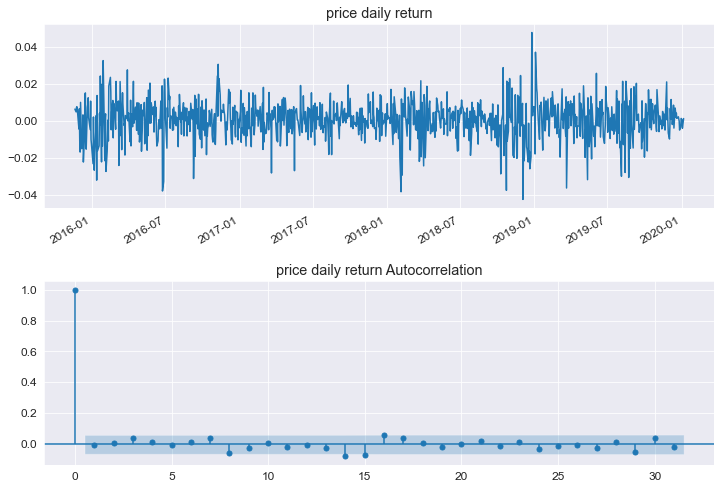

The p-value of adfuller test: 0.0
The p-value of kpss test: 0.1


In [44]:
r1_ref = data["Adj Close"].pct_change().dropna()
r1_ref.name = f'price daily return'
show_stationary(r1_ref)

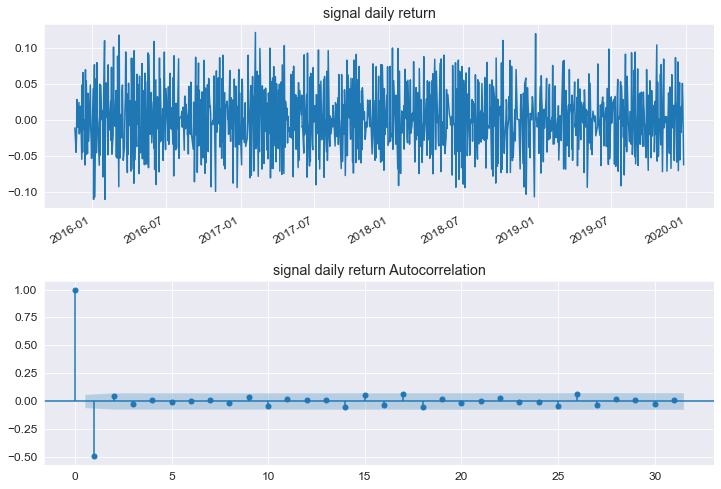

The p-value of adfuller test: 0.0
The p-value of kpss test: 0.1


In [45]:
r1_sig = data["Signal"].pct_change().dropna().iloc[:-6]
r1_sig.name = 'signal daily return'

show_stationary(r1_sig)

Both series of daily return are concluded stationary by both the ADF and KPSS test. 

In [46]:
from statsmodels.tsa.stattools import grangercausalitytests
data4test = pd.concat([r1_ref.reindex(r1_sig.index), r1_sig], axis=1)
res = grangercausalitytests(data4test, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9860  , p=0.3209  , df_denom=1027, df_num=1
ssr based chi2 test:   chi2=0.9889  , p=0.3200  , df=1
likelihood ratio test: chi2=0.9884  , p=0.3201  , df=1
parameter F test:         F=0.9860  , p=0.3209  , df_denom=1027, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1793  , p=0.3079  , df_denom=1024, df_num=2
ssr based chi2 test:   chi2=2.3701  , p=0.3057  , df=2
likelihood ratio test: chi2=2.3674  , p=0.3061  , df=2
parameter F test:         F=1.1793  , p=0.3079  , df_denom=1024, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.6340  , p=0.0000  , df_denom=1021, df_num=3
ssr based chi2 test:   chi2=23.0591 , p=0.0000  , df=3
likelihood ratio test: chi2=22.8043 , p=0.0000  , df=3
parameter F test:         F=7.6340  , p=0.0000  , df_denom=1021, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.2437  , p=0.

The p-values for lags 1 and 2 are quite large, that the null Hypothesis (the signal return series does NOT Granger cause the price return series) cannot be rejected.

## Summary

Here are some major observations:

* The data quality is not good. The provided sample has some missing or logically erroneous data, either in the prices or in the Signal. 
* Some details in the prediction is missing. For instance, the target and time horizon are not clearly stated. More importantly, the Signal and prices are of different orders of magnitude. It should be clarified how values of Signal relate to future prices.
* The effectiveness of prediction is not good. Statistics show the Signal performs even worse than a naive predictor that always gives the latest price.

Suggestions for next steps:
1. Ask the vendor for more details of the prediction process.
1. More samples of different instruments to avoid selection bias.
1. It would be better if the forecast is given with a confidence interval.
1. Whether the model can predict return ranges with probabilities? Predicting the price directly is not a good idea since price series is not stationary. A forecast error of 1 dollar has totally different effects when price is 10 dollar instead of 100 dollar. It is also of crucial importance that the error is an overestimation of price or underestimation, which is not considered when predicting price only. On the contrary, a prediction like return in 10 days is predicted to be over 5% with probability 80% might be more helpful. 